# GRIP : The Spark Foundation (Data Science and Business Analytics Intern)
# Batch : July 2021
## Author : V Sureshkumar
## **Task - 2 (Prediction using Unsupervised ML)**


## **Prediction using Unsupervised ML**

Unsupervised learning can be thought as self learning ,where you do not need to supervised the model, where model have to work on its own to discover information.Unsupervised learning mainly deals with unlabelled data.

**Cases to Prediction -**
- 1.From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.



***Importing all Required Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import scikitplot as skplt

***Reading the Dataset***

In [2]:
df = pd.read_csv("Iris.csv")

***Getting info about the data and looking for any missing data***

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.ndim

2

In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


*So there is no null values in this dataset*

In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
#take only required columns from the dataset
df_new = df.iloc[:,1:]
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df_new.shape

(150, 5)

***How to find the optimum number of clusters in K means?***

***The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.***

In [11]:
x=df_new.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
    
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

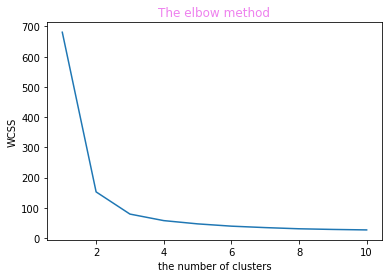

In [12]:
#now we plot a graph to observe the elbow in the line graph to know our number of clusters
plt.plot(range(1,11),wcss)
plt.title("The elbow method", color="violet")
plt.xlabel("the number of clusters")
plt.ylabel("WCSS")
plt.show()

*We can clearly see the elbow forming at '3', this is where the optimum cluster is found.*

In [13]:
#Now we apply the Kmeans tp our data set


kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

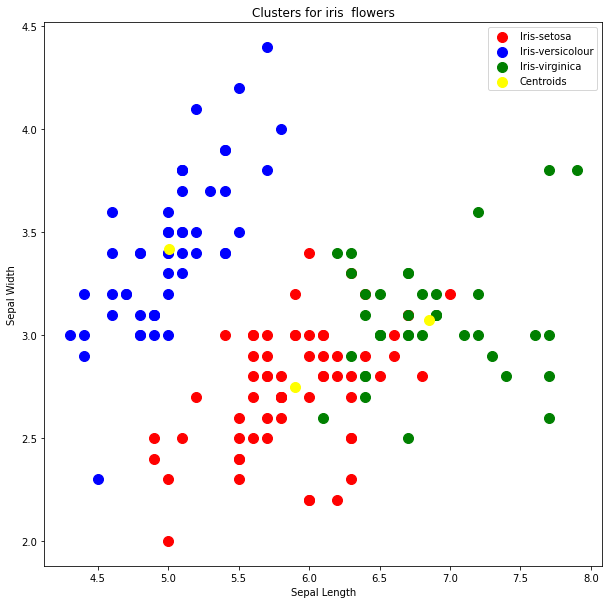

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters for iris  flowers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend()

##### Hence, we have successfully predicted the optimum number of clusters and represented it visually.